In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

Цей набір даних містить місцезнаходження, адресу, тип, ціну продажу та дату продажу проданих будівельних одиниць.

Borough (район): Цифровий код району, в якому знаходиться об'єкт нерухомості; по порядку: Манхеттен (1), Бронкс (2), Бруклін (3), Квінз (4) і Стейтен-Айленд (5).

Багато продажів відбуваються за 0 доларів. Ці продажі по суті є передачею прав власності між сторонами: наприклад, батьки передають право власності на свій будинок дитині на пенсії.

In [3]:
df = pd.read_excel('./data/rolling_sales/rs.xlsx')
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,...,1.0,0.0,1.0,1842.0,2048.0,1901.0,1,A1,655000,44866
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1,A1,215000,45034
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1,A1,570000,45161
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1.0,0.0,1.0,1782.0,1548.0,1899.0,1,A1,0,45030
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2.0,0.0,2.0,1658.0,1428.0,1901.0,1,B9,350000,45103


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73305 entries, 0 to 73304
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         73305 non-null  int64  
 1   NEIGHBORHOOD                    73305 non-null  object 
 2   BUILDING CLASS CATEGORY         73305 non-null  object 
 3   TAX CLASS AT PRESENT            73240 non-null  object 
 4   BLOCK                           73305 non-null  int64  
 5   LOT                             73305 non-null  int64  
 6   EASEMENT                        0 non-null      float64
 7   BUILDING CLASS AT PRESENT       73240 non-null  object 
 8   ADDRESS                         73305 non-null  object 
 9   APARTMENT NUMBER                17697 non-null  object 
 10  ZIP CODE                        73300 non-null  float64
 11  RESIDENTIAL UNITS               55472 non-null  float64
 12  COMMERCIAL UNITS                

In [5]:
df.head()


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,...,1.0,0.0,1.0,1842.0,2048.0,1901.0,1,A1,655000,44866
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1,A1,215000,45034
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,0.0,1.0,1646.0,1497.0,1899.0,1,A1,570000,45161
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1.0,0.0,1.0,1782.0,1548.0,1899.0,1,A1,0,45030
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2.0,0.0,2.0,1658.0,1428.0,1901.0,1,B9,350000,45103


In [6]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASEMENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [7]:
df['NEIGHBORHOOD'].value_counts().count()

253

In [8]:
df['BOROUGH'].value_counts().count()

5

Отже, у нас є 5 частин міста та 254 різних районів.

Виведемо питання для проведення аналізу:
1. чи впливає район на продажі нерухомості в Нью-Йорку чи ні? і як кожен з них впливає на це?
2. яка середня ціна продажу в кожному районі?
3. чи впливає розмір / площа на продажі?
4. чи впливає клас нерухомості на продажі?
5. на яких напрямках ми повинні зосередитися, щоб збільшити продажі?

Аналіз та очищення даних:
- змінено тип району на рядок і замінити його номер на відповідний район
- змінено тип ціни продажу на float
- змінено тип дати продажу на date
- додано місяць та рік продажу до даних

In [9]:
# Function to convert a numeric value to a date
def convert_to_date(number):
    start_date = datetime(1900, 1, 1)
    return start_date + timedelta(days=number)

# Apply the function to the specified column
df['SALE DATE'] = df['SALE DATE'].apply(lambda x: convert_to_date(x))

df['BOROUGH'] = df['BOROUGH'].astype(str)
df['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
df['SALE PRICE'] = df['SALE PRICE'].replace({' -  ':'0'})
df['SALE PRICE'] = df['SALE PRICE'].astype(float)
# df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])
df['sale_month']= df['SALE DATE'].dt.month_name()
df['sale_year']= df['SALE DATE'].dt.year
# df.to_csv('cleaned_data.csv',index=False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73305 entries, 0 to 73304
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         73305 non-null  object        
 1   NEIGHBORHOOD                    73305 non-null  object        
 2   BUILDING CLASS CATEGORY         73305 non-null  object        
 3   TAX CLASS AT PRESENT            73240 non-null  object        
 4   BLOCK                           73305 non-null  int64         
 5   LOT                             73305 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       73240 non-null  object        
 8   ADDRESS                         73305 non-null  object        
 9   APARTMENT NUMBER                17697 non-null  object        
 10  ZIP CODE                        73300 non-null  float64       
 11  RE

In [11]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASEMENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_month,sale_year
0,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,1,3028,24,NaN,A1,410 EAST 179TH STREET,NaN,...,1.0,1842.0,2048.0,1901.0,1,A1,655000.0,2022-11-03,November,2022
1,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,1646.0,1497.0,1899.0,1,A1,215000.0,2023-04-20,April,2023
2,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,66,NaN,A1,4453 PARK AVENUE,NaN,...,1.0,1646.0,1497.0,1899.0,1,A1,570000.0,2023-08-25,August,2023
3,Bronx,BATHGATE,01 ONE FAMILY DWELLINGS,1,3035,52,NaN,A1,461 EAST 178 STREET,NaN,...,1.0,1782.0,1548.0,1899.0,1,A1,0.0,2023-04-16,April,2023
4,Bronx,BATHGATE,02 TWO FAMILY DWELLINGS,1,2904,22,NaN,B9,454 EAST 172 STREET,NaN,...,2.0,1658.0,1428.0,1901.0,1,B9,350000.0,2023-06-28,June,2023


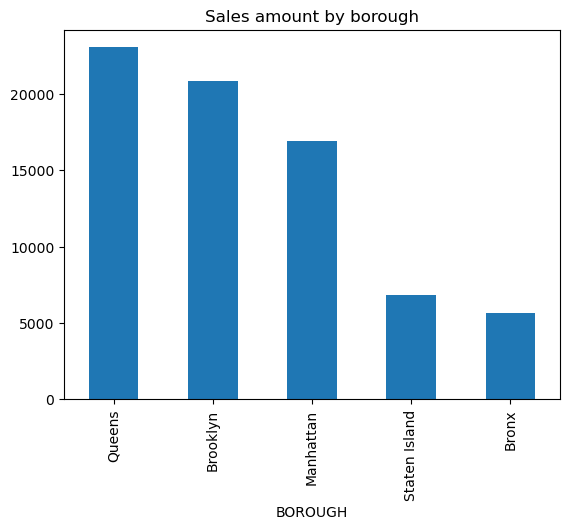

In [12]:
# Кілкість продаж
df['BOROUGH'].value_counts().plot.bar()
plt.title("Sales amount by borough");

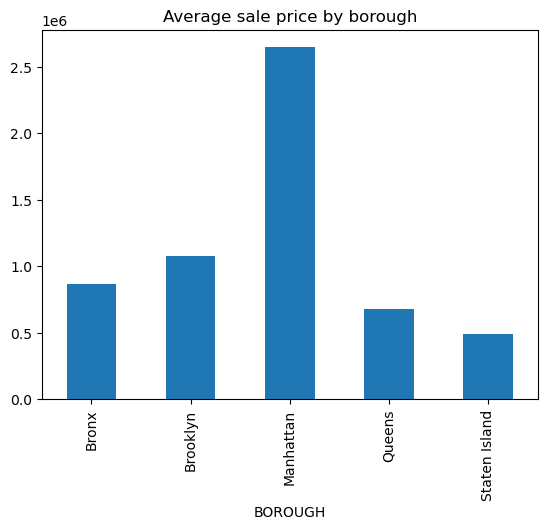

In [13]:
df['SALE PRICE'].groupby(df['BOROUGH']).mean().plot.bar()
plt.title("Average sale price by borough");

Queens має найбільше продажів, а Manhattan має найбільшу середню ціну продажу

нам потрібно більше інформації про причину

![Boroughs of New York City](https://upload.wikimedia.org/wikipedia/commons/thumb/3/34/5_Boroughs_Labels_New_York_City_Map.svg/300px-5_Boroughs_Labels_New_York_City_Map.svg.png)
![Boroughs of New York City](./data/nyb.jpg)

згідно з даними з сайту Вікі Boroughs_of_New_York_City, Манхеттен має краще географічне розташування і є найбільш густонаселеним і географічно найменшим з п'яти районів Нью-Йорка
ВВП Манхеттена є найбільшим серед п'яти районів, тому нерухомість тут повинна бути дорожчою, ніж в інших, і це виправдовує дані, при цьому Квінз має найбільшу площу, але не найдорожчу власність

In [14]:
# count of sales from Queens where sale price more than 0
df[(df['BOROUGH'] =='Queens') & (df['SALE PRICE'] != 0)].count()[0]

14985

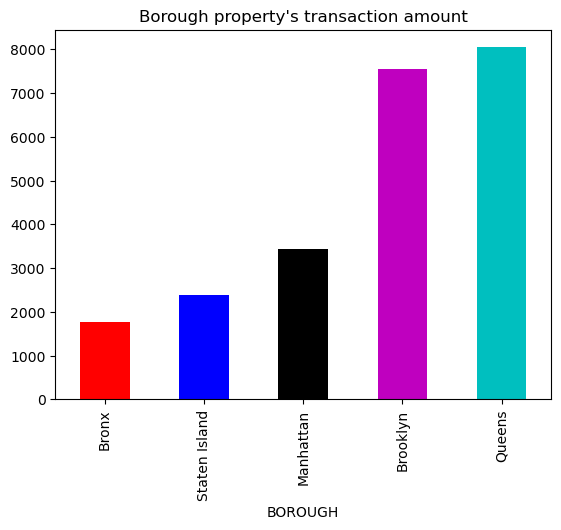

In [15]:
df[df['SALE PRICE'] == 0]['BOROUGH'].value_counts().sort_values().plot.bar(color=['r', 'b', 'k', 'm', 'c'])
plt.title("Borough property's transaction amount");

оскільки 0 sale price означає передачу нерухомості, цей графік показує кількість передач нерухомості в кожному районі

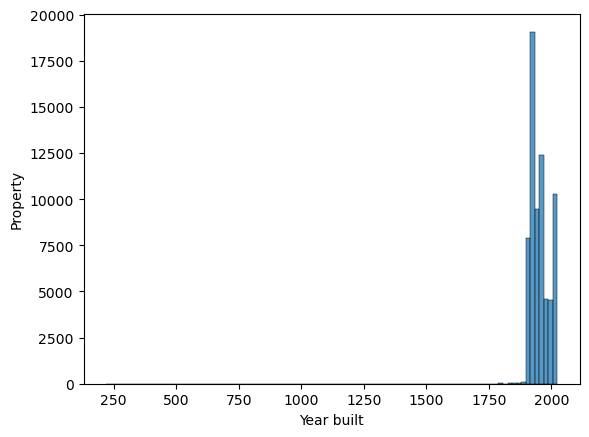

In [16]:
sns.histplot(df[df['YEAR BUILT']!=0]['YEAR BUILT'],bins=100);
plt.ylabel("Property")
plt.xlabel("Year built");

In [17]:
df[df['YEAR BUILT']!=0]['YEAR BUILT'].value_counts()

YEAR BUILT
1920.0    5189
1930.0    4359
1925.0    3722
1910.0    2807
1950.0    2759
          ... 
1879.0       1
1864.0       1
1841.0       1
1869.0       1
1878.0       1
Name: count, Length: 179, dtype: int64

більшість об'єктів нерухомості, які продаються або переходять у власність побудовано між 1910 та 1950 роками, де максимум продажів припадає на будинки 1920 року, можливо, вони мають хорошу якість

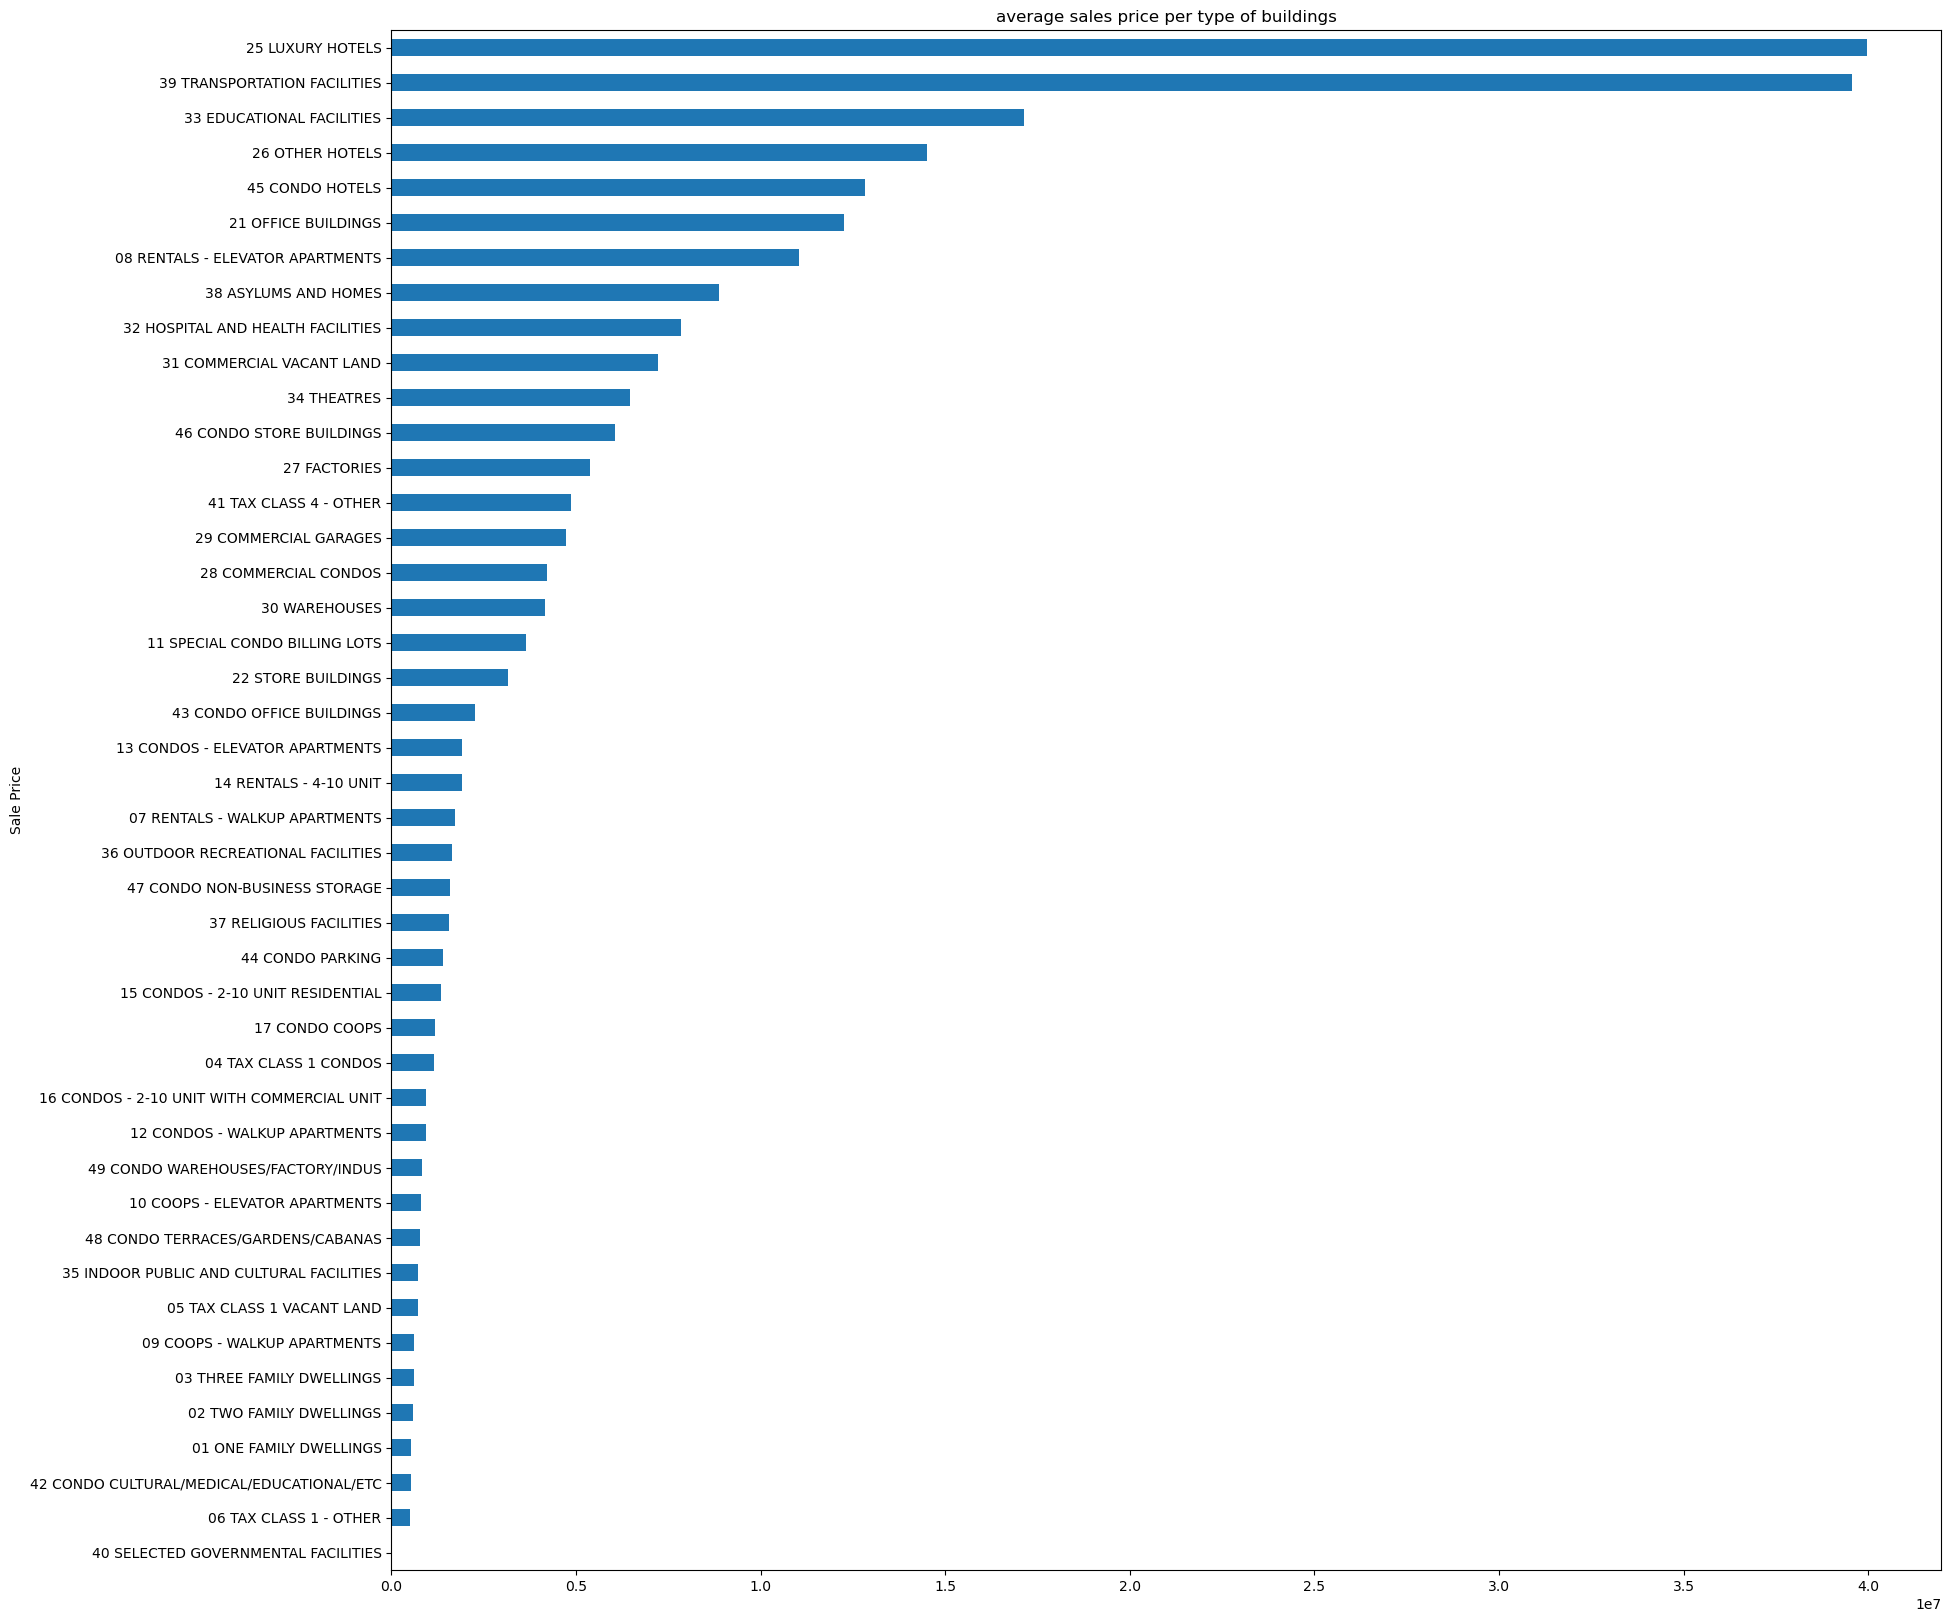

In [18]:
plt.figure(figsize=(20,20))

df['SALE PRICE'].groupby(df['BUILDING CLASS CATEGORY']).mean().sort_values().plot.barh()
plt.ylabel("Sale Price")

plt.title('average sales price per type of buildings');

схоже, що розкішні готелі та офісні будівлі є найбільш популярною категорією будівель у продажах

а нежитлова нерухомість, склади/фабрики/промислові приміщення є найменш популярною категорією будівель у продажах

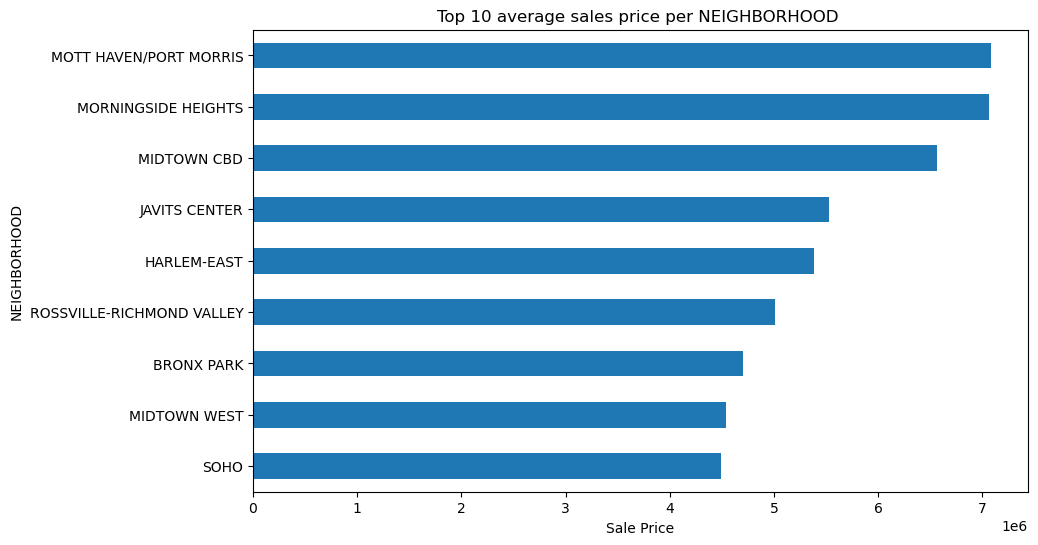

In [19]:
plt.figure(figsize=(10,6))
df['SALE PRICE'].groupby(df['NEIGHBORHOOD']).mean().sort_values()[244:].plot.barh()
plt.title('Top 10 average sales price per NEIGHBORHOOD ')
plt.xlabel("Sale Price");

Port Morris та Morningside Heights мають найбільші середні продажі серед усіх районів

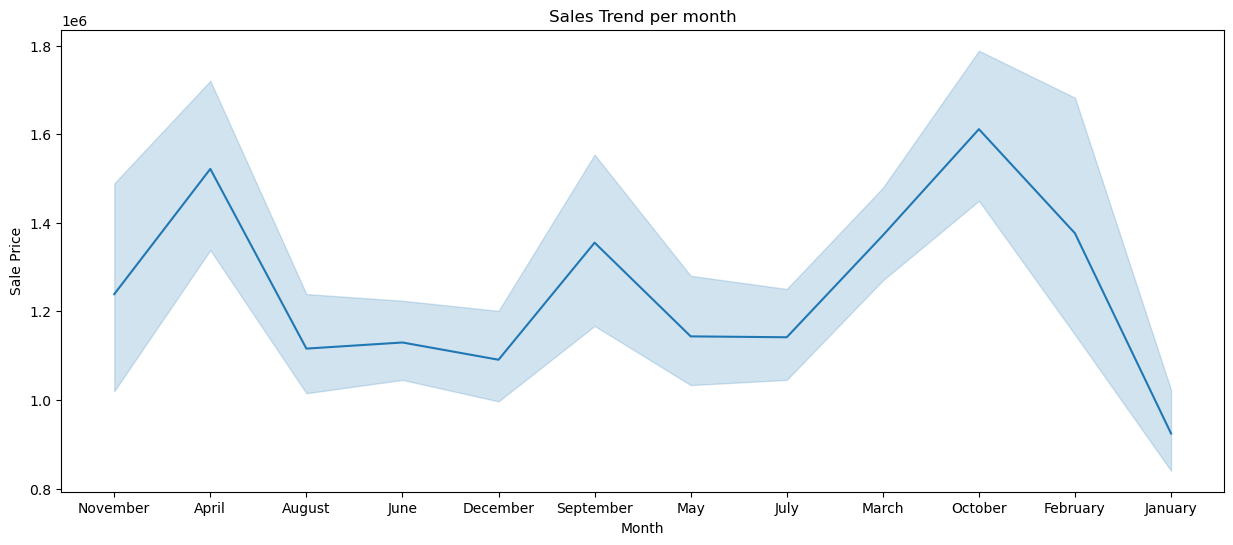

In [20]:
plt.figure(figsize=(15,6))

sns.lineplot(x='sale_month',y='SALE PRICE',data=df)
plt.title('Sales Trend per month')
plt.ylabel('Sale Price')
plt.xlabel('Month')
plt.show();

Цей графік агрегований за повторюваними значеннями (за кожен рік), щоб показати середнє значення
Видно, що у жовтні середнє значення має найбільший діапазон

це вказує на те, що у жовтні ми маємо найбільше продажів або передач з нерухомістю

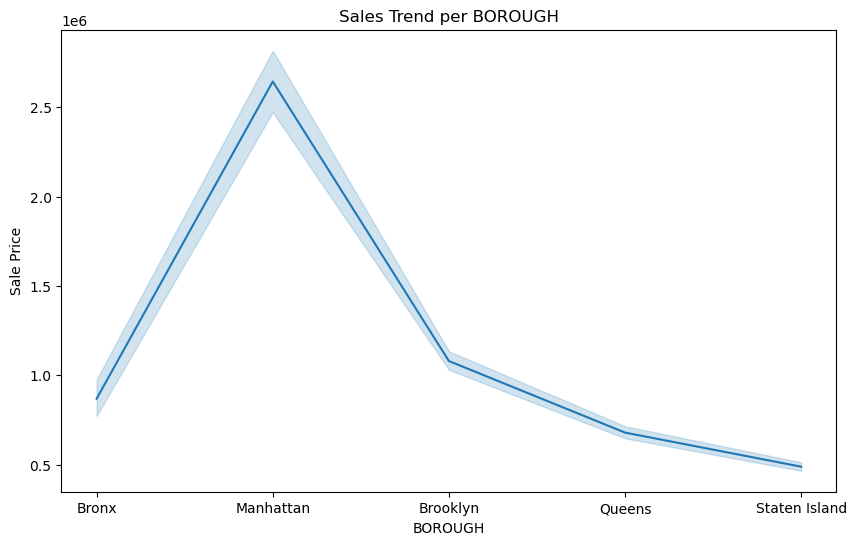

In [21]:
plt.figure(figsize=(10,6))

sns.lineplot(x='BOROUGH',y='SALE PRICE',data=df)
plt.title('Sales Trend per BOROUGH')
plt.ylabel('Sale Price')
plt.show();

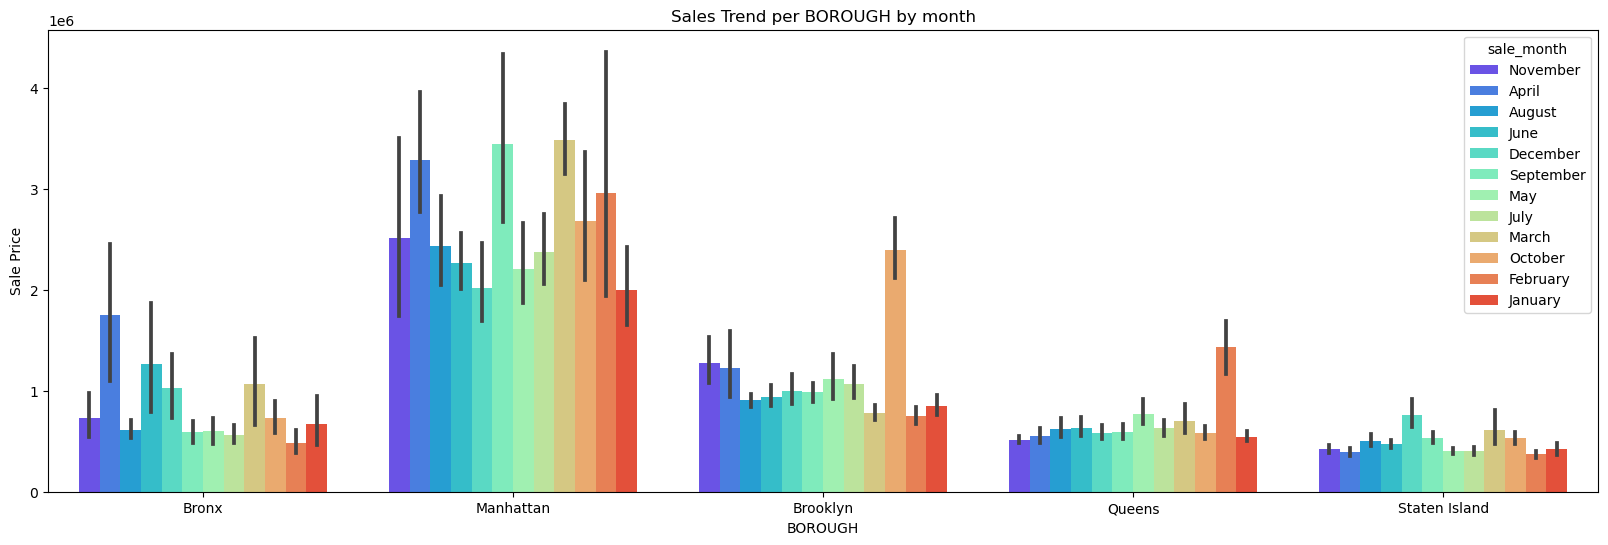

In [22]:
plt.figure(figsize=(20,6))
sns.barplot(x='BOROUGH', y='SALE PRICE', hue='sale_month', data=df, palette='rainbow');
plt.title('Sales Trend per BOROUGH by month')
plt.ylabel('Sale Price')
plt.show()

листопад і березень - місяці найбільших продажів на Манхеттені
грудень - місяць найменших продажів на Манхеттені
жовтень - місяць найбільших продажів у Брукліні
лютий - місяць найбільших продажів у Квінз
квітень - місяць найбільших продажів у Бронкс

In [23]:
# df['RESIDENTIAL UNITS'].sum(),df['COMMERCIAL UNITS'].sum(),df['TOTAL UNITS'].sum()

In [32]:
# plt.figure(figsize=(12,8))
# plt.subplot(1, 2, 1)

# sns.barplot(x="BOROUGH", y="RESIDENTIAL UNITS", data=df, estimator=sum, errorbar=None)
# plt.ylabel('Residential Units')

# plt.subplot(1, 2, 2)

# sns.barplot(x="BOROUGH", y="COMMERCIAL UNITS", data=df, estimator=sum, errorbar=None)
# plt.ylabel('Commercial Units');

#


## Years Analysis:

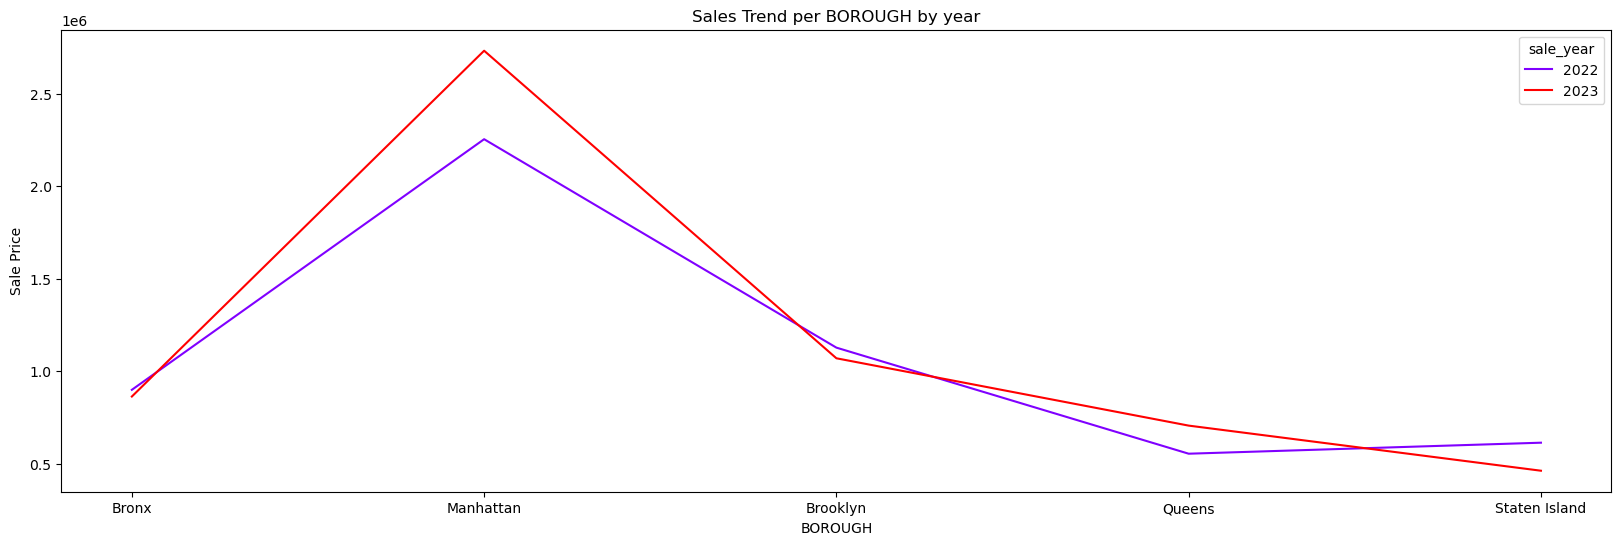

In [25]:
plt.figure(figsize=(20,6))

sns.lineplot(x="BOROUGH",y="SALE PRICE",hue='sale_year',data=df, palette='rainbow',errorbar=None)
plt.title('Sales Trend per BOROUGH by year');
plt.ylabel('Sale Price');

Це показує порівняння за роками продажів для кожного району
очевидно, що Манхеттен і Квінз мали кращі продажі у 2023 році, ніж у 2022, але інші райони мали кращі продажі у 2022 році

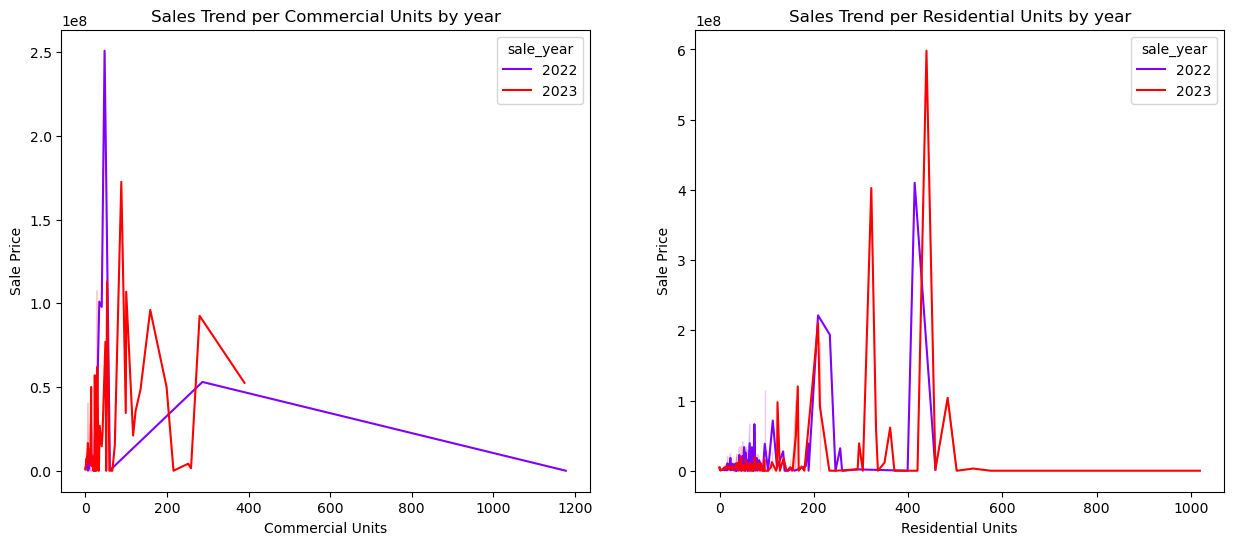

In [26]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.title('Sales Trend per Commercial Units by year')
sns.lineplot(x="COMMERCIAL UNITS",y="SALE PRICE",hue='sale_year',data=df, palette='rainbow')
plt.ylabel('Sale Price')
plt.xlabel('Commercial Units')

plt.subplot(1, 2, 2)
plt.title('Sales Trend per Residential Units by year')
sns.lineplot(x="RESIDENTIAL UNITS",y="SALE PRICE",hue='sale_year',data=df, palette='rainbow')
plt.ylabel('Sale Price')
plt.xlabel('Residential Units');

Це говорить про те, що житлових об'єктів продали більше у 2022 році, ніж у 2023 році
і це говорить про те, що більша частина доходу нерухомості надходить від житлових об'єктів, а не від комерційних об'єктів

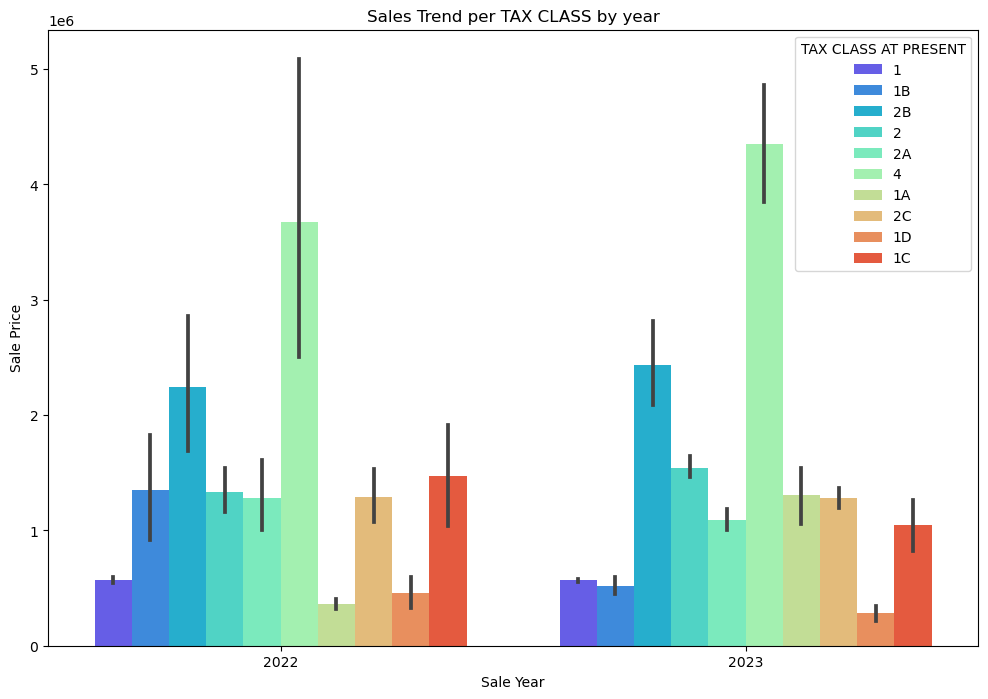

In [27]:
plt.figure(figsize=(12,8))
plt.title('Sales Trend per TAX CLASS by year')

sns.barplot(x="sale_year",y="SALE PRICE",hue='TAX CLASS AT PRESENT',data=df[df['TAX CLASS AT PRESENT']!= ' '], palette='rainbow');
plt.xlabel('Sale Year')
plt.ylabel('Sale Price');

Податковий клас (4), який включає всі інші об'єкти нерухомості, що не увійшли до класів 1,2 і 3, такі як офіси, фабрики, склади, гаражі тощо, мають найвищі середні продажі за останні роки

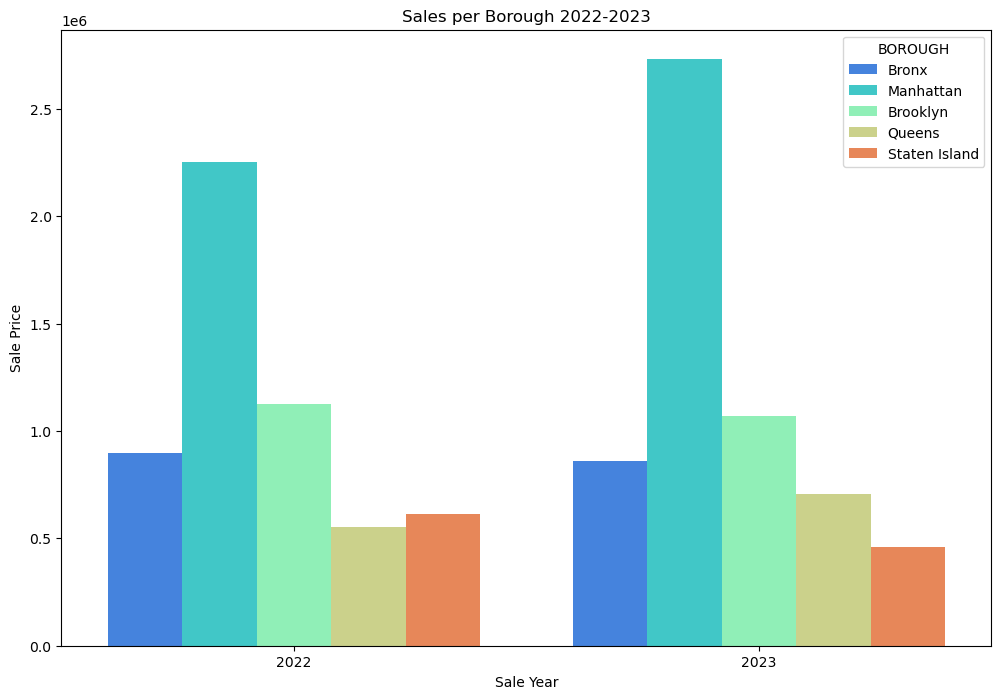

In [34]:
plt.subplots(figsize=(12,8))
sns.barplot(x='sale_year', y='SALE PRICE', hue='BOROUGH', data=df, palette='rainbow', errorbar=None)
plt.title('Sales per Borough 2022-2023')
plt.ylabel('Sale Price')
plt.xlabel('Sale Year');

Отже, ми знаємо, що Манхеттен має найбільший дохід, але на цій діаграмі ми можемо побачити, в якому порядку всі п'ять районів мають частку в загальному доході у 2022 та 2023 роках, і це виглядає наступним чином (Манхеттен, Бруклін, Бронкс, Квінз, Стейтен-Айленд).